## 1 Intro

### 1.1 Den klassiska sannolikhetsdefinitionen

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#### Övningsuppgifter

**101**\
Lejla kastar en gång med en vanlig symmetrisk tärning.\
a) Vad är sannolikheten att tärningen visar högst fyra prickar? **Svar:** 4/6\
b) Vad är sannolikheten att tärningen visar minst fem prickar? **Svar:** 2/6\
c) Vilket samband finns det mellan svaren i a) och b)? **Svar:** Summan av sannolikheterna är 1, b) är därför en komplement till a) och viseversa

**102**\
a) Sannolikheten att händelse A inträffar är 1/3. Vad är sannolikheten att A inte inträffar? **Svar:** 2/3.\
b) Vilket samband gäller mellan sannolikheten för en händelse och dess komplement? **Svar:** Tillsammans utgör de den totala antalet av möjliga utfall.

**103**\
a) Azzam singlar slant med två mynt och är intresserad av att bestämma sannolikheten att få exakt en krona. han resonerar på följande sätt. Antalet krona vid kast med två mynt kan anta tre olika värden: 0, 1 eller 2. Bara ett av dessa resulterar i händelsen exakt en krona. Sannolikheten är därför 1/3 enligt den klassiska definitionen. är resonemanget korrekt?\
**Svar:** Resonemanget är EJ korrekt. Ett mynt kan antingen vara 0 eller 1. Utfallen för två mynt är kan då uttryckas som [0, 0] , [1, 0] , [0, 1] , [1, 1]. Därför är sannolikheten 2/4 och inte 1/3.

b) Du kan själv göra ett praktiskt försök så här. Kasta två mynt 100 gånger - eller simulera situationen med hjälp av datorn. Beräkna därefter den relativa frekvensen för händelsen exakt en krona genom att dividera antalet gånger händelsen inträffat i de 100 kasten med antalet kast (100). Kommentera resultatet.

In [38]:
def heads_cointoss(nr_of_coins, times):
    heads = 0
    for i in range(times):

        flip = np.random.randint(low=0, high=2, size=nr_of_coins)

        if np.logical_or(
            np.logical_and(flip[0] == 0, flip[1] == 1),
            np.logical_and(flip[0] == 1, flip[1] == 0),
        ):
            heads += 1
    print(
        f"Exactly one head came up: {heads} times out of {times}. The probability is therefore {heads/times:.0%}."
    )


heads_cointoss(2, 100)

Exactly one head came up: 53 times out of 100. The probability is therefore 53%


c) gör en korrekt beräkning av sannolikheten för exakt en krona vid kast med två mynt. Varför är svaret 1/3 felaktigt?\
**Svar:** Ja, kastet av två mynt kan resultera i antingen 0, 1 eller 2. Men värdet 1 kan förekomma på två sätt:\
När Mynt<sub>1</sub> = 0 och Mynt<sub>2</sub> = 1 eller när Mynt<sub>1</sub> = 1 och Mynt<sub>2</sub> = 0

Antalet möjliga utfall är därför 4, och sannolikheten är 2/4.

**104**\
Linnea kastar samtidigt en blå och en gul symmetrisk tärning.\
a) För varje kast skriver hon upp antalet prickar som de båda tärningarna visar. Detta innebär 36 möjliga utfall. Vilka är dessa?\
**Svar:**

In [55]:
yellow = [1, 2, 3, 4, 5, 6]
blue = [1, 2, 3, 4, 5, 6]
outcomes = []
for i in yellow:
    for j in blue:
        outcomes.append([i, j])
print(*outcomes, "\nTotal outcomes: ", len(outcomes))

[1, 1] [1, 2] [1, 3] [1, 4] [1, 5] [1, 6] [2, 1] [2, 2] [2, 3] [2, 4] [2, 5] [2, 6] [3, 1] [3, 2] [3, 3] [3, 4] [3, 5] [3, 6] [4, 1] [4, 2] [4, 3] [4, 4] [4, 5] [4, 6] [5, 1] [5, 2] [5, 3] [5, 4] [5, 5] [5, 6] [6, 1] [6, 2] [6, 3] [6, 4] [6, 5] [6, 6] 
Total outcomes:  36


b) Linnea adderar nu antalet prickar som de båda tärningarna visar. Vilka värden kan denna summa anta?\
**Svar:**

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


C:\Users\Ally\AppData\Local\Temp\ipykernel_15460\120554943.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'size':10})


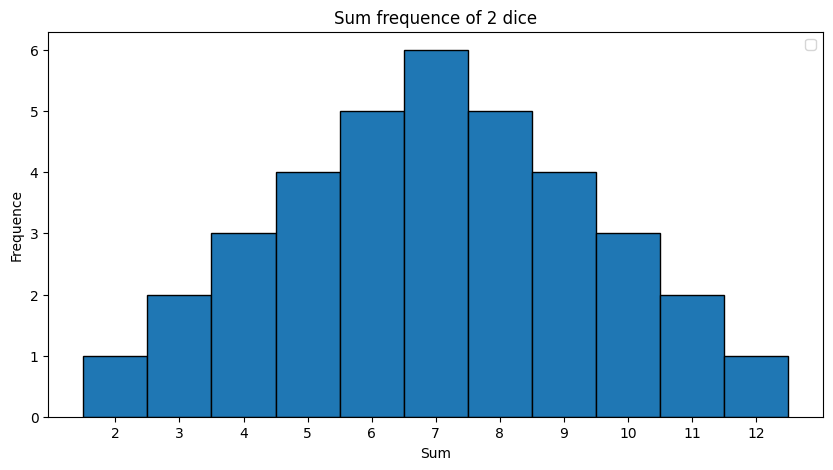

In [156]:
outcomes_sum = []
for result in outcomes:
    outcomes_sum.append(result[0] + result[1])

print(set(outcomes_sum))
plt.figure(figsize=(10, 5))
plt.hist(outcomes_sum, bins=np.arange(2, 14) - 0.5, edgecolor="black")
plt.xticks(np.arange(2,13))
plt.xlabel('Sum')
plt.ylabel('Frequence')
plt.title('Sum frequence of 2 dice')


c) Beräkna sannolikheten att summan av antalet prickar är fem.\
**Svar:** \
$\begin{aligned}
\frac{4}{36} = \frac{1}{9}
\end{aligned}
$\
d) Beräkna sannolikheten att summan av antalet prickar är högst fyra.\
**Svar:**\
$\begin{aligned}\frac{1+2+3}{36} = \frac{6}{36} = \frac{1}{6}\end{aligned}$\
e) Beräkna sannolikheten att summan av antalet prickar är minst fem.\
**Svar:**\
$\begin{aligned}1 - \frac{1}{6} = \frac{5}{6}\end{aligned}$\
f) Vilket samband finns det mellan svaren i d) och e)?\
**Svar:** d) och e) är komplementhändelser till varandra och tillsammans är antalet möjliga utfall.

### 1.4 Odds

#### Övningsuppgifter

**106**\
I den officiella statistiken redovisas antalet födda pojkar per 1000 födda flickor på det här sättet för några år i början av 2010-talet.
|År|2010|2011|2012|2013|2014|
|:---|---|---|---|---|---|
|Antal pojkar|1056|1048|1058|1061|1059|

Gör en uppskattning av sannolikheten för pojkfödsel.

**Svar:**\
$\begin{aligned}
pojkfödsel& = 1056 + 1048 + 1058 + 1061 + 1059 \\
&= 5282\\
sammanlagd& = 10282\\
\\
\frac{5282}{10282}& \approx 0.514 = 51\%
\end{aligned}$

**107**\
Sannolikheten för en händelse är 0.25. Ange oddset för händelsen.\
**Odds:**
$\begin{aligned}
O(A)=\frac{Pr(A)}{Pr(\overline{A})}=\frac{Pr(A)}{1-Pr(A)}
\end{aligned}$

**Svar:**
$\begin{aligned}
\frac{0.25}{1-0.25}=\frac{0.25}{0.75}=1:3
\end{aligned}$

### 1.5 Mängdlära

#### Övningsuppgifter

**109**\
Följande mängder är givna:\
$ S =\left\{1,2,3,4,5,6,7,8,9\right\} \\ A =\left\{2,4,6,8\right\} \quad B =\left\{1,2,3,4,8,9\right\}$

Ange elementen i mängderna:\
$ a) A\cap B \quad\quad b) A\cup B \quad\quad c) A\cap\overline{B} \quad\quad d) \overline{A}\cap B\\
e) \overline{A}\cap\overline{B} \quad\quad f) \overline{A\cap B} \quad\quad g) (A\cap\overline{B})\cup(\overline{A}\cap B)$

Beskriv med ord de olika mängderna.

**Svar:**\
a) A snitt B: Element som finns i båda mängderna.\
= $\left\{2,4,8\right\}$\
b) A union B: Element som finns i en av mängderna.\
= $\left\{1,2,3,4,6,8,9\right\}$\
c) A snitt B-komplement: Element som finns i A och B-komplement. = Finns i A men inte B.\
$\begin{aligned}\overline{B}&=\left\{5,6,7\right\} \\
A\cap\overline{B} &= \left\{6\right\}\end{aligned}$\
d) A-komplement snitt B: Element som finns i A-komplement och B. = Finns inte i A men i B.\
$\begin{aligned}
\overline{A} &= \left\{1,3,5,7,9\right\}\\
\overline{A}\cap B &= \left\{1,3,9\right\}\end{aligned}$\
e) A-komplement snitt B-komplement: Element som finns i A-komplement och B-komplement. = Finns inte i A eller B.\
= $\left\{5,7\right\}$\
f) (A snitt B)-komplement: Komplementmängden till $A\cup B$\
=$\left\{5,7\right\}$\
g) Union av c) och d)\
=$\left\{1,3,6,9\right\}$


**110**\
I en tillverkningsprocess är A mängden enheter fel a och B mängden enheter med fel b.\
Ange uttryck för mängden:

a) enheter med båda felen\
b) enheter med minst ett av felen\
c) enheter utan fel\
d) enheter utan fel a\
e) enheter med enbart fel a\
f) enheter med exakt ett av de två felen\
Rita Venndiagram och ange i dessa de olika mängderna.

**Svar:**\
$\begin{aligned}
&a) A\cap B \quad\quad &b) A \cup B \quad\quad &c) \overline{A}\cap\overline{B}\\
&d) \overline{A} \quad\quad &e) A \cap \overline{B} \quad\quad &f) (A\cap\overline{B})\cup(\overline{A}\cap B)
\end{aligned}$

### 1.6 Kombinatorik

#### Övningsuppgifter

**115**\
I kvällskursen deltar 23 personer: 18 kvinnor och 5 män. Nu är det dags att välja kursombud. På hur många sätt kan man välja två personer om den först valda ska vara kursombud och den andra suppleant.\
**Svar:** 23 * 22 = 506

**116**\
Hur många fyrsiffriga tal (0 som första siffra räknas inte) kan man bilda av de tio siffrorna 0,1..9 om samma siffra:\
a) får förekomma flera gånger\
**Svar:**
|plats|1000|100|10|1|
|---|---|---|---|---|
|siffror|9|10|10|10|

$9*10*10*10=9000$

b) inte får förekomma flera gånger\
**Svar:**
|plats|1000|100|10|1|
|---|---|---|---|---|
|siffror|9|9|8|7|

$9*9*8*7=4536$

In [4]:
9*9*8*7

4536

**117**\
Tio personer har sökt tjänsten som kyrkokamrer. Inför beslutet i kyrkorådet är det kyrkoherdens uppgift att välja ut tre personer bland de sökande och rangordna dessa. På hur många sätt kan detta ske?\
**Svar:**\
$10*9*8=720$ sätt

**118**\
Tennisklubbens styrelse består av åtta personer. Tre av dessa ska väljas för att planera det stundande femårsjubiléet. På hur många olika sätt kan valet sker?\
**Svar:**\
$\begin{aligned}
\binom{8}{3}=\frac{8!}{3!*(8-3)!} =\frac{8!}{3!* 5!} =\frac{8*7*6}{3*2*1}=56
\end{aligned}$

**119**\
De tre lärarrepresentanterna i institutionsstyrelsen ska väljas bland två professorer och fem lektorer. Vi antar att valet sker slumpmässigt. Vad är sannolikheten att man väljer en professor och två lektorer?\
**Svar:**
||professor|lektor||totalt|
|---|---|---|---|---|
|samtliga|2|5|=|7|
|urvalet|1|2|=|3|

Antal möjliga utfall:\
$\begin{aligned}
\binom{7}{3}=\frac{7!}{3!*(7-3)!} =\frac{7!}{3!* 4!} =\frac{7*6*5}{3*2*1}=35
\end{aligned}$

En professor ska bli vald:\
$\begin{aligned}
\binom{2}{1} = 2
\end{aligned}$


En lektor ska bli vald:\
$\begin{aligned}
\binom{5}{2} = \frac{5!}{2!*(5-2)!} =\frac{5*4}{2*1}=10
\end{aligned}$

**Sannolikheten:**\
$\begin{aligned}
\frac{\binom{2}{1}*\binom{5}{2}}{\binom{7}{3}} = \frac{2*10}{35} =\frac{20}{35}\approx 0.57 = 57\%
\end{aligned}$

**120**\
Hur många olika bokstavsföljder kan man bilda om man använder samtliga bokstäver i ordet JOKKMOKK?\
**Svar:**
|bokstav|antal|
|---|---|
|J|1|
|O|2|
|K|4|
|M|1|

$\begin{aligned}
\frac{8!}{4!*2!*1!*1!}=840\end{aligned}$ bokstavsföljder

**121**\
Michaela har fått ett nytt jobb. Därför har hon bjudit med Mikael på restaurang. Menyn innehåller fjorton rätter av vilka fyra är förrätter,sju varmrätter och tre desserter.
|Förrätt|Varmrätt|Dessert||totalt|
|---|---|---|---|---|
|4|7|3|=|14|


a) Hur många olika sätt kan de komponera? En måltid består av tre rätter, en av varje slag.\
**Svar:**\
$7*4*3=84$ sätt

b) På menyn finns det två kötträtter bland förrätter och fem kötträtter bland varmrätterna. Hur många måltider är det möjligt att komponera om vi anser det omöjligt med kött till både förrätt och varmrätt?\
||Kött|Ej Kött|
|---|---|---|
|Förrätt|2|2|
|Varmrätt|5|2|

**Svar:**\
Omöjliga måltider: $2*5*3 = 30$\
Totala antalet - omöjliga = $84-30=54$ måltider

## 2 Sannolikhetsbegrepp

### 2.1 Slumpförsök, utfallsrum, händelse

Exempel:
|**Slumpförsök**|**Utfallsrum**|
|:---|:---|
|*Kast med tärning*|$\{1,2,3,4,5,6\}$|
|*Köp av lott*|$\{\text{vinst, ej vinst} \}$|

#### Övningsuppgifter

**201**\
Vad innebär begreppen:

a) modell\
**Svar:**\
En modell beskriver ett fenomen med matematiska uttryck.\
En sannolikhetsmodell beskriver fördelningen av resultaten av experimentet.\
'En modell ska återge väsentliga egenskaper utan att kopiera alla detaljer.'\
b) slumpförsök\
**Svar:** En händelse med oförutsägbar utfall.\
c) utfallsrum\
**Svar:** slumpförsökets alla möjliga utfall.\
d) händelse\
**Svar:** 'En händelse är en delmängd av försökets utfallsrum'\
e) säker händelse\
**Svar:** Består av alla utfall i utfallsrummet.\
f) omöjlig händelse\
**Svar:** Består av inget utfall.

**202**\
Rita venndiagram

**203**\
A,B och C är tre händelser, som kan inträffa i ett slumpförsök. Hur läser man följande uttryck:

$\begin{aligned}
\text{a)}& \quad A\cup B\cup C& \quad\quad \text{b)}& A\cap B\cap C\\
\text{c)}& \quad A\cap \overline{B}\cap\overline{C}& \text{d)}&\overline{A}\cap\overline{B}\cap\overline{C}
\end{aligned}$

**Svar:**\
a) Minst en av händelserna inträffar.\
b) Alla händelser inträffar samtidigt.\
c) Endast A inträffar.\
d) Ingen av händelserna.